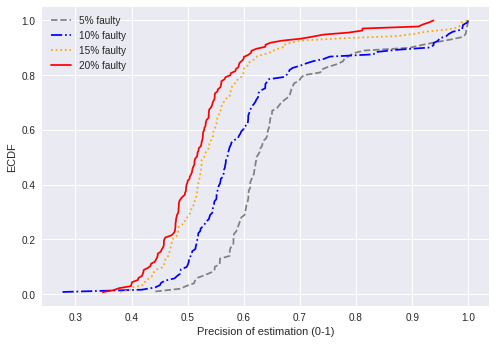

In [56]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity', 'eligible','total']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data.time))
        client_data = client_data.head(200)
        data = pd.concat([data, client_data])
        
    data = data.resample('2Min').mean()
    return data

data5 = read_clients("tolerance/5")
data10 = read_clients("tolerance/10")
data15 = read_clients("tolerance/15")
data20 = read_clients("tolerance/20")



def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

plt.plot(getECDF(data5), color= 'grey', linestyle='--')
plt.plot(getECDF(data10), color= 'blue', linestyle='-.')
plt.plot(getECDF(data15), color='orange', linestyle=':')
plt.plot(getECDF(data20), color= 'red', linestyle='-')

styles=['bs-', 'ro-', 'y^-']


plt.xlabel('Precision of estimation (0-1)')
legends = ['5% faulty','10% faulty', '15% faulty', '20% faulty']
plt.legend(legends)
plt.ylabel('ECDF')
plt.show()